This notebook is to test this example: https://climpred.readthedocs.io/en/v2.1
.0/examples/decadal/tropical-pacific-ssts.html

In [11]:
%matplotlib inline

import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

import climpred
from climpred import HindcastEnsemble

In [12]:
warnings.filterwarnings("ignore")

In [32]:
hind = climpred.tutorial.load_dataset('CESM-DP-SST-3D')['SST']
recon = climpred.tutorial.load_dataset('FOSI-SST-3D')['SST']

In [34]:
print(hind.TLONG.shape)
print(hind.TAREA.values[0])

(37, 26)
[3.66077352e+13 3.66077352e+13 3.66077352e+13 3.66077352e+13
 3.66077352e+13 3.66077352e+13 3.66077352e+13 3.66077352e+13
 3.66077352e+13 3.66077352e+13 3.66077352e+13 3.66077352e+13
 3.66077352e+13 3.66077352e+13 3.66077352e+13 3.66077352e+13
 3.66077352e+13 3.66077352e+13 3.66077352e+13 3.66077352e+13
 3.66077352e+13 3.66077352e+13 3.66077352e+13 3.66077352e+13
 3.66077352e+13 3.66077352e+13]


[Text(0.5, 1.0, 'Example Data Coverage')]

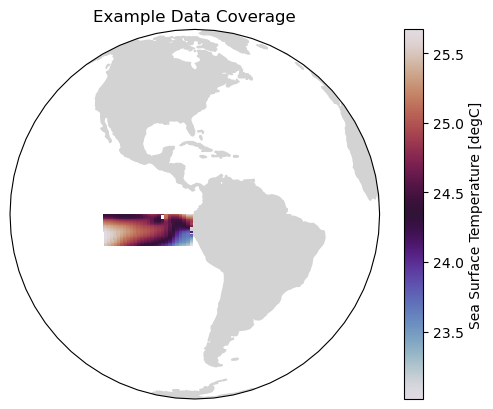

In [4]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 0))
p = ax.pcolormesh(recon.TLONG, recon.TLAT, recon.mean('time'),
              transform=ccrs.PlateCarree(), cmap='twilight')
ax.add_feature(cfeature.LAND, color='#d3d3d3')
ax.set_global()
plt.colorbar(p, label='Sea Surface Temperature [degC]')
ax.set(title='Example Data Coverage')

In [5]:
recon = recon - recon.sel(time=slice(1964, 2014)).mean('time')

In [6]:
hind = climpred.stats.rm_trend(hind, dim='init')
recon = climpred.stats.rm_trend(recon, dim='time')

In [7]:
hind['lead'].attrs['units'] = 'years'

In [9]:
hindcast = HindcastEnsemble(hind)
hindcast = hindcast.add_observations(recon)
print(hindcast)

climpred.HindcastEnsemble

<Initialized Ensemble>
Dimensions: (nlat: 37, nlon: 26, init: 64, lead: 10)
Coordinates:
 TLAT (nlat, nlon) float64 ...
 TLONG (nlat, nlon) float64 ...
 * init (init) object 1954-01-01 00:00:00 ... 2017-01-01 00:00:00
 * lead (lead) int32 1 2 3 4 5 6 7 8 9 10
 TAREA (nlat, nlon) float64 ...
 * nlat (nlat) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35 36
 * nlon (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24 25
Data variables:
 SST (init, lead, nlat, nlon) float64 -0.2981 -0.2923 ... 0.5382 0.5266 Initialized Ensemble Dimensions: nlat : 37 nlon : 26 init : 64 lead : 10 Coordinates: (7) TLAT (nlat, nlon) float64 ... units : degrees_north long_name : array of t-grid latitudes [962 values with dtype=float64] TLONG (nlat, nlon) float64 ... units : degrees_east long_name : array of t-grid longitudes [962 values with dtype=float64] init (init) object 1954-01-01 00:00:00 ... 2017-01-... standard_name : forecast_reference_time long_name : Initialization description : The forecast reference time in NWP is the "data time", the time of the analysis from which the forecast was made. It is not the time for which the forecast is valid; the standard name of time should be used for that time. array([cftime.DatetimeProlepticGregorian(1954, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1955, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1956, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1957, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1958, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1959, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1960, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1961, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1962, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1963, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1964, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1965, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1966, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1967, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1968, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1969, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1970, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1971, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1972, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1973, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1974, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1975, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1976, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1977, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1978, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1979, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1981, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1982, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1983, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1984, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1985, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1986, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1987, 1, 1, 0, 0, 0, 0, has_year_zero=True),
 cftime.DatetimeProlepticGregorian(1988, 1, 1, 0, 0

<Observations>
Dimensions: (nlat: 37, nlon: 26, time: 68)
Coordinates:
 TLAT (nlat, nlon) float64 -9.75 -9.75 -9.75 ... -0.1336 -0.1336 -0.1336
 TLONG (nlat, nlon) float64 250.8 251.9 253.1 254.2 ... 276.7 277.8 278.9
 * time (time) object 1948-01-01 00:00:00 ... 2015-01-01 00:00:00
 TAREA (nlat, nlon) float64 3.661e+13 3.661e+13 ... 3.714e+13 3.714e+13
 * nlat (nlat) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35 36
 * nlon (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24 25
Data variables:
 SST (time, nlat, nlon) float64 0.2235 0.2227 0.225 ... 1.393 1.301 Observations Dimensions: nlat : 37 nlon : 26 time : 68 Coordinates: (6) TLAT (nlat, nlon) float64 -9.75 -9.75 ... -0.1336 -0.1336 units : degrees_north long_name : array of t-grid latitudes array([[-9.75034113, -9.75034113, -9.75034113, -9.75034113, -9.75034113,
 -9.75034113, -9.75034113, -9.75034113, -9.75034113, -9.75034113,
 -9.75034113, -9.75034113, -9.75034113, -9.75034113, -9.75034113,
 -9.75034113, -9.75034113, -9.75034113, -9.75034113, -9.75034113,
 -9.75034113, -9.75034113, -9.75034113, -9.75034113, -9.75034113,
 -9.75034113],
 [-9.48320897, -9.48320897, -9.48320897, -9.48320897, -9.48320897,
 -9.48320897, -9.48320897, -9.48320897, -9.48320897, -9.48320897,
 -9.48320897, -9.48320897, -9.48320897, -9.48320897, -9.48320897,
 -9.48320897, -9.48320897, -9.48320897, -9.48320897, -9.48320897,
 -9.48320897, -9.48320897, -9.48320897, -9.48320897, -9.48320897,
 -9.48320897],
 [-9.21607677, -9.21607677, -9.21607677, -9.21607677, -9.21607677,
 -9.21607677, -9.21607677, -9.21607677, -9.21607677, -9.21607677,
 -9.21607677, -9.21607677, -9.21607677, -9.21607677, -9.21607677,
 -9.21607677, -9.21607677, -9.21607677, -9.21607677, -9.21607677,
 -9.21607677, -9.21607677, -9.21607677, -9.21607677, -9.21607677,
 -9.21607677],
 [-8.94894453, -8.94894453, -8.94894453, -8.94894453, -8.94894453,
 -8.94894453, -8.94894453, -8.94894453, -8.94894453, -8.94894453,
...
 -0.93496507, -0.93496507, -0.93496507, -0.93496507, -0.93496507,
 -0.93496507],
 [-0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 ,
 -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 ,
 -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 ,
 -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 ,
 -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 , -0.6678322 ,
 -0.6678322 ],
 [-0.40069932, -0.40069932, -0.40069932, -0.40069932, -0.40069932,
 -0.40069932, -0.40069932, -0.40069932, -0.40069932, -0.40069932,
 -0.40069932, -0.40069932, -0.40069932, -0.40069932, -0.40069932,
 -0.40069932, -0.40069932, -0.40069932, -0.40069932, -0.40069932,
 -0.40069932, -0.40069932, -0.40069932, -0.40069932, -0.40069932,
 -0.40069932],
 [-0.13356644, -0.13356644, -0.13356644, -0.13356644, -0.13356644,
 -0.13356644, -0.13356644, -0.13356644, -0.13356644, -0.13356644,
 -0.13356644, -0.13356644, -0.13356644, -0.13356644, -0.13356644,
 -0.13356644, -0.13356644, -0.13356644, -0.13356644, -0.13356644,
 -0.13356644, -0.13356644, -0.13356644, -0.13356644, -0.13356644,
 -0.13356644]]) TLONG (nlat, nlon) float64 250.8 251.9 253.1 ... 277.8 278.9 units : degrees_east long_name : array of t-grid longitudes array([[250.81250698, 251.93750701, 253.06250704, 254.18750707,
 255.3125071 , 256.43750714, 257.56250717, 258.6875072 ,
 259.81250723, 260.93750726, 262.06250729, 263.18750732,
 264.31250736, 265.43750739, 266.56250742, 267.68750745,
 268.81250748, 269.93750751, 271.06250754, 272.18750757,
 273.31250761, 274.43750764, 275.56250767, 276.6875077 ,
 277.81250773, 278.93750776],
 [250.81250698, 251.93750701, 253.06250704, 254.18750707,
 255.3125071 , 256.43750714, 257.56250717, 258.6875072 ,
 259.81250723, 260.93750726, 262.06250729, 263.18750732,
 264.31250736, 265.43750739, 266.56250742, 267.68750745,
 268.81250748, 269.93750751, 271.06250754, 272.18750757,
 273.31250761, 274.43750764, 275.56250767, 276.6875077 ,
 277.81250773, 278.93750776],
 [250.81250698, 251.93750701, 253.06250704, 25

In [10]:
predictability = hindcast.verify(metric='acc')
print(predictability)

ValueError: Designate a dimension to reduce over when applying the metric. Got None. Choose one or more of ['nlat', 'nlon', 'init', []]